# Basic EDA

In [58]:
from typing import List, Tuple, Union

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import quantstats as qs

from pathlib import Path
from tqdm import tqdm

In [59]:
data_path = Path('.').resolve() / 'data'
data_path

WindowsPath('E:/VSCodeProjects/hanaquantchallenge/data')

In [60]:
df = pd.read_csv(data_path / 'Data-QuantTrading.csv')
df = df.iloc[:, 1:]
df

,virtual_dt,open,high,low,close,vwap,volume,amount,ticks,bid,bid_size,ask,ask_size,KST,tr_date,signal
0,2020-01-02 00:00:00,3237.00,3238.00,3234.25,3237.75,3236.20860,7126.0,23061222.50,1256.0,3237.50,37.0,3237.75,26.0,2020-01-02 08:09:59.541837412+09:00,2020-01-02,0
1,2020-01-02 00:10:00,3237.75,3239.75,3237.75,3239.75,3238.72393,3280.0,10623014.50,781.0,3239.50,18.0,3239.75,67.0,2020-01-02 08:19:58.181620251+09:00,2020-01-02,0
2,2020-01-02 00:20:00,3239.50,3240.75,3239.00,3240.25,3239.90333,2193.0,7105108.00,479.0,3240.25,8.0,3240.50,36.0,2020-01-02 08:29:58.750208471+09:00,2020-01-02,0
3,2020-01-02 00:30:00,3240.50,3240.50,3238.50,3238.75,3239.38759,1579.0,5114993.00,415.0,3238.75,14.0,3239.00,44.0,2020-01-02 08:39:57.647607341+09:00,2020-01-02,0
4,2020-01-02 00:40:00,3238.75,3239.00,3238.25,3238.75,3238.58134,1005.0,3254774.25,297.0,3238.75,33.0,3239.00,47.0,2020-01-02 08:49:59.071013731+09:00,2020-01-02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96850,2022-09-30 22:10:00,3609.25,3612.75,3607.50,3608.50,3610.10610,16353.0,59036065.00,3197.0,3608.50,5.0,3608.75,25.0,2022-10-01 05:19:59.694927777+09:00,2022-09-30,0
96851,2022-09-30 22:20:00,3608.50,3610.75,3606.50,3608.00,3608.62619,4608.0,16628549.50,1248.0,3608.00,7.0,3608.25,12.0,2022-10-01 05:29:59.514792145+09:00,2022-09-30,0
96852,2022-09-30 22:30:00,3608.00,3608.00,3602.75,3602.75,3605.53910,4361.0,15723756.00,1140.0,3602.75,21.0,3603.00,8.0,2022-10-01 05:39:59.442415095+09:00,2022-09-30,0
96853,2022-09-30 22:40:00,3603.00,3604.75,3602.00,3604.75,3603.19832,3628.0,13072403.50,934.0,3604.50,12.0,3604.75,8.0,2022-10-01 05:49:58.698429778+09:00,2022-09-30,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96855 entries, 0 to 96854
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   virtual_dt  96855 non-null  object 
 1   open        96855 non-null  float64
 2   high        96855 non-null  float64
 3   low         96855 non-null  float64
 4   close       96855 non-null  float64
 5   vwap        96855 non-null  float64
 6   volume      96855 non-null  float64
 7   amount      96855 non-null  float64
 8   ticks       96855 non-null  float64
 9   bid         96855 non-null  float64
 10  bid_size    96855 non-null  float64
 11  ask         96855 non-null  float64
 12  ask_size    96855 non-null  float64
 13  KST         96855 non-null  object 
 14  tr_date     96855 non-null  object 
 15  signal      96855 non-null  int64  
dtypes: float64(12), int64(1), object(3)
memory usage: 11.8+ MB


## preprocessing

In [62]:
df['virtual_dt'] = pd.to_datetime(df['virtual_dt'])

In [63]:
df['tr_date'] = pd.to_datetime(df['tr_date'])

In [64]:
df['KST'] = pd.to_datetime(df['KST'])

In [65]:
df.set_index('virtual_dt', inplace=True)

## feature extraction


하지만 단순 bid-ask spread처럼 linearly dependent한 것은 의미가 별로 없을 것이고, 

체결강도같은 것은 매수체결수량, 매도체결수량을 알아야 하기 때문에 체결 총 수량만 알 수 있어 구할 수 없다. 

대신 매수 매도 잔량의 비율을 넣어보고, (물론 의미는 다르지만.)


microprice도 넣어보자. 

$$

Microprice = \frac{V_t^b}{V_t^b + V_t^a}P_t^a + \frac{V_t^a}{V_t^b + V_t^a}P_t^b

$$

In [ ]:
df['mid'] = (df['bid'] + df['ask']) / 2

In [ ]:
df['microprice'] = (df['bid_size'] / (df['bid_size'] + df['ask_size'])) * df['bid'] \
    + (df['ask_size'] / (df['bid_size'] + df['ask_size'])) * df['ask']

In [ ]:
df['bidask_size_ratio'] = df['ask_size'] / df['bid_size']
# > 1 이면 매수잔량이 더 쌓여있는 것이므로 내려갈 가능성이 더 높아짐. 

In [ ]:
# linearly dependent 한 것은 LD로 표시 

df['LD_bidask_spread'] = df['bid'] - df['ask']

In [ ]:
df.to_pickle(data_path / 'data_quanttrading.pickle')

## plotting

In [66]:
ONE_DAY = 137

<AxesSubplot: xlabel='virtual_dt', ylabel='vwap'>

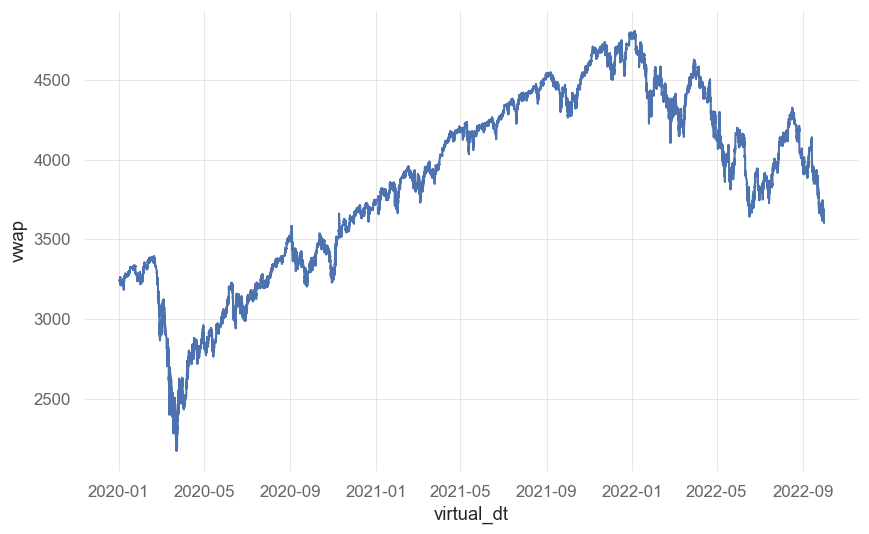

In [67]:
sns.lineplot(data=df, x=df.index, y='vwap')

In [68]:
df_small = df.iloc[:ONE_DAY * 7].copy()

fig = go.Figure(
    data=[go.Candlestick(
        x=df.index,
        open=df_small['open'],
        high=df_small['high'],
        low=df_small['low'],
        close=df_small['close']
    )]
)

fig.show()

interactive 하게 살펴본 결과, 

- trading day 가 아닌 주말 등은 단절이 존재하고, 가격 자체가 다른 지점에서 시작한다. (주말에 쉬고, 주말의 뉴스가 단절로 반영됨.)
- 매일 22시50분 데이터를 마지막으로 1시간 비니까 그 시간은 비어있게 된다. otherwise 24시간 돌아간다. 
- candle로 보니까 하락 상승할 때의 trend가 더 잘 드러난다. 하락시 연속 음봉(여기선 빨강) 계속되는 것 알 수 있고, 저점 찍고 올라오는 모습 보인다. 


<AxesSubplot: xlabel='virtual_dt', ylabel='amount'>

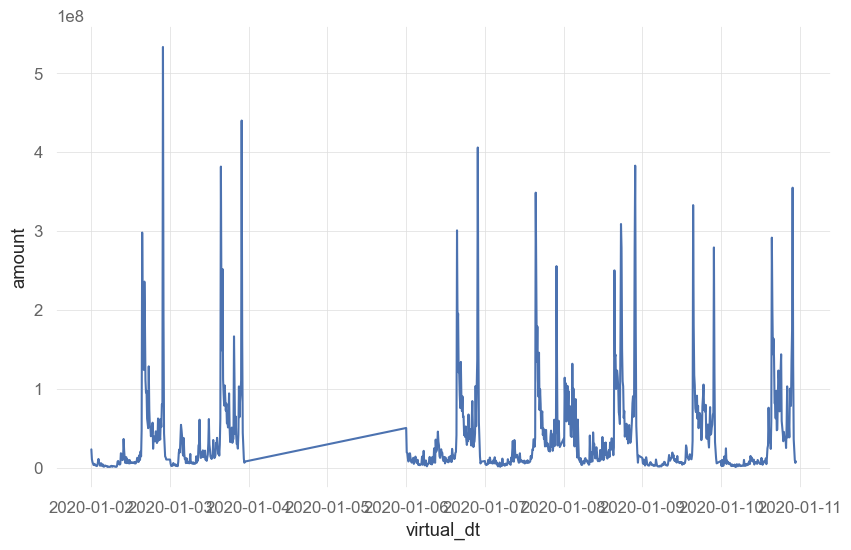

In [69]:
sns.lineplot(data=df_small, x=df_small.index, y='amount')

volume peak 잡는 것이 쉽지 않아보이지만, 시도는 가능할 듯. 

<AxesSubplot: xlabel='virtual_dt', ylabel='bidask_spread'>

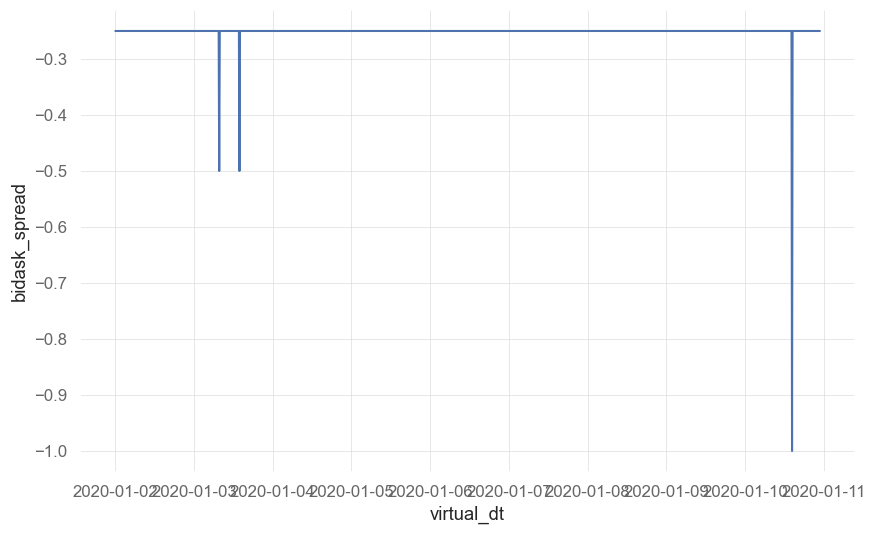

In [70]:
# bid-ask spread 확인 

df_small['bidask_spread'] = df_small['bid'] - df_small['ask']
sns.lineplot(data=df_small, x=df_small.index, y='bidask_spread')

저런 데이터 포인트들은 정상이 아닐 가능성이 높음. 

bid size도 꼭 봐야한다. 

bid size를 봐야 내가 한쪽으로 포지션 쏠렸을 때 빠져나올 수 있는지 여부를 확인할 수 있다.

In [71]:
df[df['bid_size'] == df['bid_size'].max()]

,open,high,low,close,vwap,volume,amount,ticks,bid,bid_size,ask,ask_size,KST,tr_date,signal
virtual_dt,,,,,,,,,,,,,,,
2020-03-13 14:40:00,2595.0,2595.0,2595.0,2595.0,2595.0,21.0,54495.0,14.0,2595.0,9765.0,2596.0,1.0,2020-03-13 21:49:51.789553415+09:00,2020-03-13,0


처음엔 이건 비정상인 데이터 아닌가? outlier로 하여 날려줘야 하는 것 아닌가 했지만 시기를 보자. 

2020년 3월 13일이다. 

S&P 차트를 확인해보니 엄청난 crash를 맞고 있던 떄 이다. 

매수잔량 = `bid_size`가 9765나 되고 

매도잔량 = `ask_size`는 1이다. 

매수 잔량이 저렇게 쌓인다는 것은 시장이 올라갈 것이라 예측하지 않고 더 내려갈 것이라 예측하기에 저렇게 쌓이는 것이다. 

반대로 매도 잔량이 쌓이는 것은 가격이 올라갈 것이라 예측해 올라오면 팔아야지~ 하는 세력이 많다는 뜻이다. 

bid 와 ask의 성질에 대한 이해가 선행되어야 함을 뼈저리게 느낀다. 

즉, 좀 더 많은 캔들에 대한 메트릭이 feature로 추가되어야 한다. 


## backtest

`signal` column은 매수 매도할 수량을 적는 곳이지, 현재 포지션이 아니다. 

또한, `signal`을 내면 그 같은 줄에서 거래가 일어나는 것이 아닌 다음 칸에서 거래가 일어나도록 해야한다. 

그렇게 해서 10min 단위의 Profit/Loss 를 구하고, 이를 누적합하여 PnL을 그려줘야 한다. 

기본 booksize에 대한 이야기가 없는데, 예를들어 20mil으로 둔다면, 포지션을 청산하는 것은 자연스럽게 마켓에서 발을 빼는, 2 fund separation과 같은 효과를 가지게 된다. 


최종적으로는, 

1. signal을 비워놓은 상태의 `.csv` 파일을 input으로 받아 `signal` 컬럼을 채워 뱉어주는 프로그램이 필요하고,
2. `signal`은 매수/매도 계약 수라서 전략 짤 때 쓰기 좋지 않으니 `positional weight`를 토대로 전략을 짰을 때 `signal` 컬럼을 만들어주는 기능이 필요하며,
3. 이렇게 만든 전략을 `positional_weight`든, `signal`이든 PnL을 그리고 각종 메트릭을 통해 backtest하는 기능이 필요하며 
    - daily portfolio return이 나와야 `QuantStats`를 통해 performance metric을 확인할 수 있고 
    - daily return을 내기 위해선 unrealized PnL을 daily로 만들어내 이를 daily %화 시켜야 하는데 
    - 이 떄 `INITIAL_CASH`에 따라 결과가 달라질 수 있지... 않나? 


In [16]:
def realize_cashflow_after_trade(
    signal:int, 
    bid_price, 
    bid_size, 
    ask_price, 
    ask_size) -> float:
    """Trade result of one day shifted signal

    Args:
        signal (int): yesterday's buy/sell amount (difference of yesterday & today's position)
        bid_price (float): price when you sell
        bid_size (int): maximum sellable amount
        ask_price (float): price when you buy
        ask_size (int): maximum buyable amount

    Returns:
        int: amount of realized position change from this trade
        float: amount of cash change from this trade
    """    
    if signal == 0:

        return 0, 0.0
    
    elif signal > 0: # 매수시 ask_price로 체결
        traded = min(signal, ask_size)

        return traded, -traded * ask_price
    
    elif signal < 0: # 매도시 bid_price로 체결    
        traded = -min(abs(signal), ask_size)

        return traded, -traded * bid_price


### Test out backtest logic

`signal`을 포지션과 혼동했던 것이 처음의 이상한 backtest 결과의 원인이었다. 

결국 퀀트 시그널을 주어 거래할 때 내일 오르냐 내리냐는 방향성을 예측했다면 조금 사냐 조금 파냐의 문제가 아니고 아예 보유 포지션 자체를 뒤집어야한다. 

그럼 결국 이 과제에서의 `signal`은 `position`의 diff에 불과하므로 `position`을 alpha signal로써 찍고, 제출할 때는 단지 그 차분을 하여 제출을 하면 된다. 

정리하자면, PnL은 다음과 같이 구해진다. 

- 오를지 내릴지 방향성을 포함해 실제로 예측하는 것은 `position_signal`이다. 
    - 지금은 n개로 표시하지만, 추후엔 current cash와의 weight로 조절해야 한다. 
        - long일 경우 **+0.1** : +0.9 처럼. 
        - short일 경우 **-0.3** : +1.3 처럼. 
- 이것은 예측이므로, 1칸 shift해준다. (`position_signal_shifted`)
    - 이 포지션이 내가 해당 날짜에 가지고자 하는 포지션이다. 
    - 다만 여기선 불완전한게, 애초에 daily row 낼 때부터 bid/ask size에 맞게 되어야 하고 만약 하나라도 중간에 bid/ask size보다 커서 전부 체결되지 못하면 그 뒤로의 position amount는 계속 틀리게되니까 주의해야 한다. 
- 어쨋든 각 날짜의 포지션을 예측하고 이를 성공적으로 트레이딩해서 그 포지션을 만들었다면, 매일매일 트레이딩해야 하는 signal 값은 포지션을 diff한 값이 된다. (`signal_unlimited`)
    - 아까 말했듯 애초에 daily row를 하나씩 찍을 떄마다 이게 bid/ask size 안에 들어오는지 확인해서 position을 찍어줘야하기 때문에 position을 차분한 뒤 bid/ask size를 따지는 것은 사실 무의미하다. 
- 어쩃든 여기선 일단 이 signal이 실제 체결 가능한 것인지 판단해서 제출해야하는 `signal` column으로 만든다. 
    - daily로 trade amount를 구해주는 `realize_cashflow_after_trade`를 쓰는데, 결국 이 함수는 signal 단에서 이뤄지는 것이 아니라 최초의 position weight 단에서 이뤄질 수 있도록 해야한다. 
    - 이러면 어제와 오늘을 모두 봐야 diff인 signal을 구할 수 있기에 `numba`로 for문 돌리는 것이 나을 수 있다. 
- 

In [17]:
df_backtest_sample = df.iloc[:6].copy()

# sample_position = [1, -1, 0, 2, -1000, 0]
sample_position = [10, 20, -10, -200, -300, 0]
df_backtest_sample['position_signal'] = pd.Series(sample_position).values

발견한 사실: index가 0, 1, 2, ... 아닌 virtual_dt로 바뀐 상태에서 그냥 무작정 `df_backtest_sample['signal'] = pd.Series(sample_signal)` 하려고 하면 모두 `NaN` 뜬다. 

In [18]:
df_backtest_sample['cash_chg'] = np.nan

In [19]:
df_backtest_sample['position_signal_shifted'] = df_backtest_sample['position_signal'].shift()

In [20]:
df_backtest_sample['signal_unlimited'] = df_backtest_sample['position_signal'].diff()

In [21]:
df_backtest_sample.loc[df_backtest_sample.index[0], 'signal_unlimited'] = 0 # shift로 None이 된 첫 칸 0으로 변경 (NoneType erorr 피하기 위해)

In [22]:
df_backtest_sample['signal'] = df_backtest_sample.apply(
    lambda row: realize_cashflow_after_trade(
        row['signal_unlimited'], 
        row['bid'],
        row['bid_size'],
        row['ask'],
        row['ask_size'],
        )[0],
    axis=1
    )

In [23]:
df_backtest_sample

,open,high,low,close,vwap,volume,amount,ticks,bid,bid_size,ask,ask_size,KST,tr_date,signal,mid,position_signal,cash_chg,position_signal_shifted,signal_unlimited
virtual_dt,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00,3237.00,3238.00,3234.25,3237.75,3236.20860,7126.0,23061222.50,1256.0,3237.50,37.0,3237.75,26.0,2020-01-02 08:09:59.541837412+09:00,2020-01-02,0.0,3237.625,10,NaN,NaN,0.0
2020-01-02 00:10:00,3237.75,3239.75,3237.75,3239.75,3238.72393,3280.0,10623014.50,781.0,3239.50,18.0,3239.75,67.0,2020-01-02 08:19:58.181620251+09:00,2020-01-02,10.0,3239.625,20,NaN,10.0,10.0
2020-01-02 00:20:00,3239.50,3240.75,3239.00,3240.25,3239.90333,2193.0,7105108.00,479.0,3240.25,8.0,3240.50,36.0,2020-01-02 08:29:58.750208471+09:00,2020-01-02,-30.0,3240.375,-10,NaN,20.0,-30.0
2020-01-02 00:30:00,3240.50,3240.50,3238.50,3238.75,3239.38759,1579.0,5114993.00,415.0,3238.75,14.0,3239.00,44.0,2020-01-02 08:39:57.647607341+09:00,2020-01-02,-44.0,3238.875,-200,NaN,-10.0,-190.0
2020-01-02 00:40:00,3238.75,3239.00,3238.25,3238.75,3238.58134,1005.0,3254774.25,297.0,3238.75,33.0,3239.00,47.0,2020-01-02 08:49:59.071013731+09:00,2020-01-02,-47.0,3238.875,-300,NaN,-200.0,-100.0
2020-01-02 00:50:00,3239.00,3239.00,3237.50,3237.50,3238.04602,1043.0,3377282.00,297.0,3237.50,44.0,3237.75,40.0,2020-01-02 08:59:59.867055611+09:00,2020-01-02,40.0,3237.625,0,NaN,-300.0,300.0


In [24]:
df_backtest_sample['cash_chg'] = df_backtest_sample.apply(
    lambda row: realize_cashflow_after_trade(
        row['signal'], 
        row['bid'],
        row['bid_size'],
        row['ask'],
        row['ask_size'],
        )[1],
    axis=1
    )

In [25]:
INITIAL_CASH = 2e+6

df_backtest_sample.loc[df_backtest_sample.index[0], 'cash_chg'] = INITIAL_CASH # 최초의 cash amount

In [26]:
df_backtest_sample['current_actual_position'] = df_backtest_sample['signal'].cumsum()

In [27]:
df_backtest_sample['current_cash'] = df_backtest_sample['cash_chg'].cumsum()

In [28]:
df_backtest_sample['current_value'] = df_backtest_sample['current_actual_position'] * df_backtest_sample['mid'] + df_backtest_sample['current_cash']

In [29]:
df_backtest_sample['current_value']

virtual_dt
2020-01-02 00:00:00    2000000.000
2020-01-02 00:10:00    1999998.750
2020-01-02 00:20:00    2000002.500
2020-01-02 00:30:00    2000027.000
2020-01-02 00:40:00    2000021.125
2020-01-02 00:50:00    2000154.875
Name: current_value, dtype: float64

In [30]:
df_backtest_sample

,open,high,low,close,vwap,volume,amount,ticks,bid,bid_size,...,tr_date,signal,mid,position_signal,cash_chg,position_signal_shifted,signal_unlimited,current_actual_position,current_cash,current_value
virtual_dt,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00,3237.00,3238.00,3234.25,3237.75,3236.20860,7126.0,23061222.50,1256.0,3237.50,37.0,...,2020-01-02,0.0,3237.625,10,2000000.00,NaN,0.0,0.0,2000000.00,2000000.000
2020-01-02 00:10:00,3237.75,3239.75,3237.75,3239.75,3238.72393,3280.0,10623014.50,781.0,3239.50,18.0,...,2020-01-02,10.0,3239.625,20,-32397.50,10.0,10.0,10.0,1967602.50,1999998.750
2020-01-02 00:20:00,3239.50,3240.75,3239.00,3240.25,3239.90333,2193.0,7105108.00,479.0,3240.25,8.0,...,2020-01-02,-30.0,3240.375,-10,97207.50,20.0,-30.0,-20.0,2064810.00,2000002.500
2020-01-02 00:30:00,3240.50,3240.50,3238.50,3238.75,3239.38759,1579.0,5114993.00,415.0,3238.75,14.0,...,2020-01-02,-44.0,3238.875,-200,142505.00,-10.0,-190.0,-64.0,2207315.00,2000027.000
2020-01-02 00:40:00,3238.75,3239.00,3238.25,3238.75,3238.58134,1005.0,3254774.25,297.0,3238.75,33.0,...,2020-01-02,-47.0,3238.875,-300,152221.25,-200.0,-100.0,-111.0,2359536.25,2000021.125
2020-01-02 00:50:00,3239.00,3239.00,3237.50,3237.50,3238.04602,1043.0,3377282.00,297.0,3237.50,44.0,...,2020-01-02,40.0,3237.625,0,-129510.00,-300.0,300.0,-71.0,2230026.25,2000154.875
